In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

No handles with labels found to put in legend.


[]


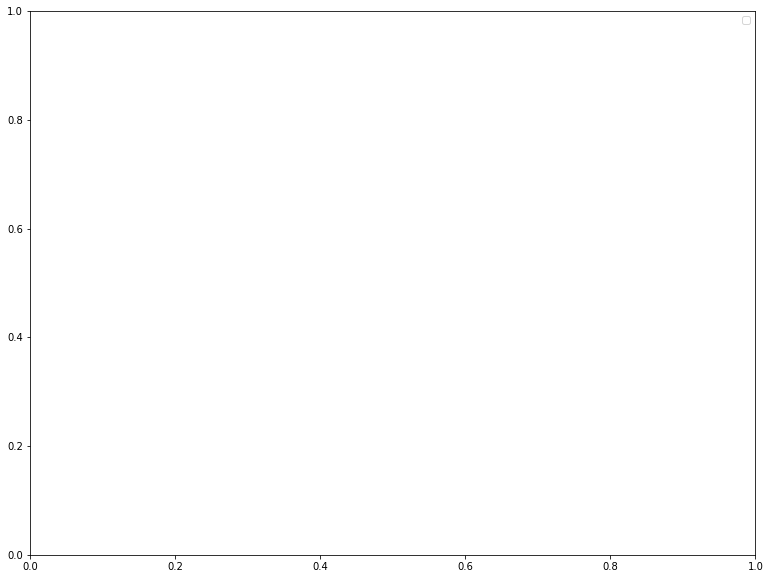

(0, 0.003)

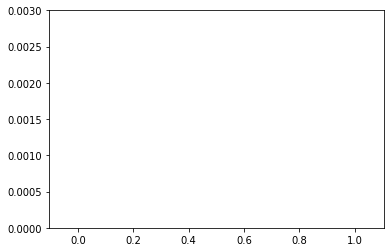

In [4]:
directory = "tr"
fig = plt.subplots(nrows = 1, ncols = 1, sharex = False, sharey = False, figsize = (13, 10))
var1=[]
var2=[]
l=[]
for root,dirs,files in os.walk(directory):
    for file in tqdm(files):
        if file.endswith(".csv") and file.startswith("sample"):
            file_path = os.path.join(directory,file)
            df= pd.read_csv(file_path)
            
            sns.distplot(df.iloc[1:,:],label=file)
            
            l.append((float)(file.split("_")[-1].split(".")[0]))
            var1.append(df.iloc[0,0]/(float)(file.split("_")[-1].split(".")[0]))
            var2.append(df.iloc[1:,0].var())
            print(l)
print(var2)
plt.legend()
plt.show()
plt.scatter(l,var1)
plt.scatter(l,var2)
plt.ylim(0,0.003)

In [5]:
df=pd.read_csv("moments.csv",header=None)
df_separated=df.iloc[1:,0].str.split(pat=";",expand=True).astype(float)
df_separated.columns= df.iloc[0,0].split(";")
#df_separated['Statistical Moment']=df.iloc[:,0].str.split(pat=";",expand=True)[1].astype(float)

sns.barplot(x=df_separated['Order'], y =df_separated['Statistical Moment'])


FileNotFoundError: [Errno 2] No such file or directory: 'moments.csv'

In [88]:
df_separated

,Order,Statistical Moment
1,0.0,1.000000
2,1.0,-0.052216
3,2.0,1.987609
4,3.0,-0.443077
5,4.0,12.708220
6,5.0,-5.834233
7,6.0,136.979800
8,7.0,-82.283720
9,8.0,1959.829000
10,9.0,-1201.986000
